<a href="https://colab.research.google.com/github/Lenis14183/QM206/blob/main/EXAMEN_COMPUTACIONAL_LENIS_SANCHEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LENIS SÁNCHEZ
#Ejemplo 1 con el documento:co-emissions-per-capita-.csv to co-emissions-per-capita- (1).csv
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()



Saving co-emissions-per-capita new2 (1).csv to co-emissions-per-capita new2 (1).csv


Resumen estadístico de los datos:
               Year  Annual_CO2_emissions_per_capita
count  26600.000000                     2.660000e+04
mean    1949.096880                     2.182557e+07
std       56.387496                     2.325755e+07
min     1750.000000                     0.000000e+00
25%     1915.000000                     5.485310e+06
50%     1963.000000                     1.327592e+07
75%     1994.000000                     3.113626e+07
max     2022.000000                     1.568619e+08


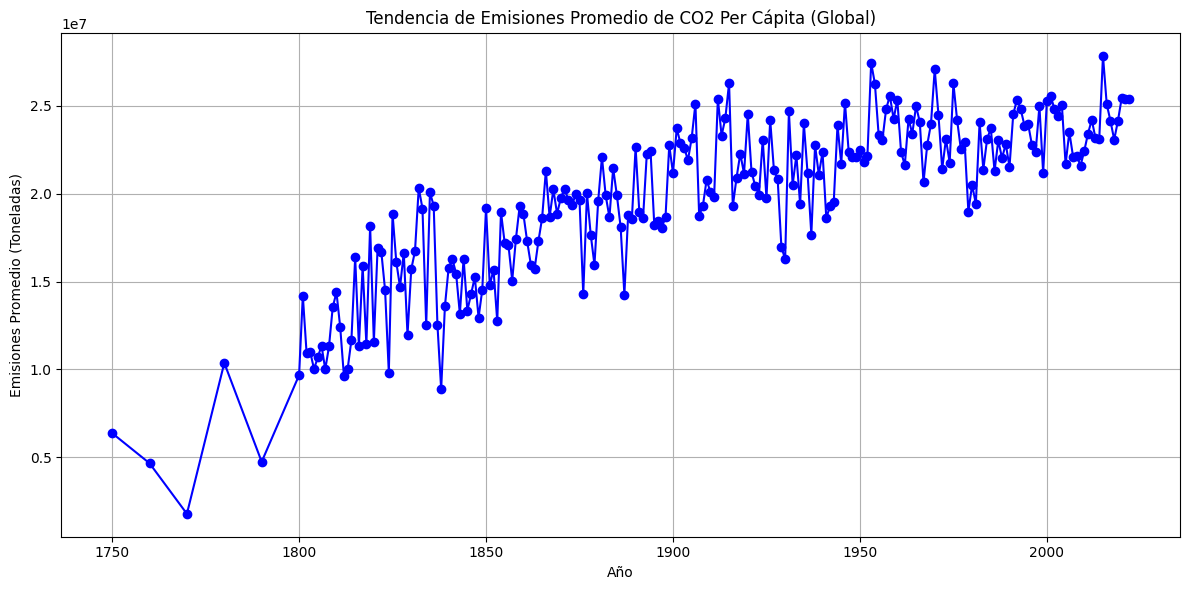

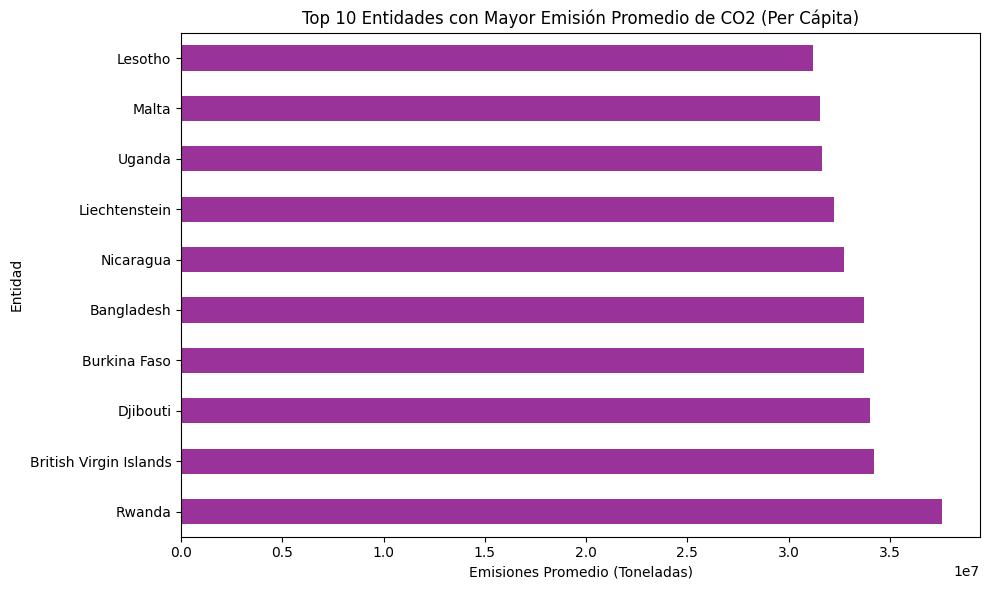

<Figure size 1000x600 with 0 Axes>

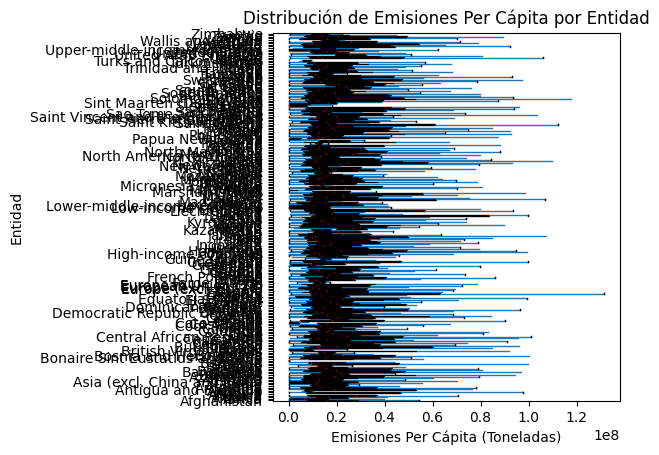

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Corregir problemas en los datos
df.rename(columns={'Annual CO2 emissions (per capita)': 'Annual_CO2_emissions_per_capita'}, inplace=True)
df['Annual_CO2_emissions_per_capita'] = pd.to_numeric(df['Annual_CO2_emissions_per_capita'], errors='coerce')

# Análisis descriptivo básico
print("Resumen estadístico de los datos:")
print(df.describe())

# Visualización: Gráfico de líneas
emissions_trend = df.groupby('Year')['Annual_CO2_emissions_per_capita'].mean()

plt.figure(figsize=(12, 6))
plt.plot(emissions_trend.index, emissions_trend.values, marker='o', linestyle='-', color='blue')
plt.title('Tendencia de Emisiones Promedio de CO2 Per Cápita (Global)')
plt.xlabel('Año')
plt.ylabel('Emisiones Promedio (Toneladas)')
plt.grid()
plt.tight_layout()
plt.show()

# Visualización: Gráfico de barras horizontales
emissions_mean_top10 = df.groupby('Entity')['Annual_CO2_emissions_per_capita'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
emissions_mean_top10.plot(kind='barh', color='purple', alpha=0.8)
plt.title('Top 10 Entidades con Mayor Emisión Promedio de CO2 (Per Cápita)')
plt.xlabel('Emisiones Promedio (Toneladas)')
plt.ylabel('Entidad')
plt.tight_layout()
plt.show()

# Visualización: Gráfico de caja (Boxplot)
plt.figure(figsize=(10, 6))
df.boxplot(column='Annual_CO2_emissions_per_capita', by='Entity', grid=False, vert=False, showfliers=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red'))
plt.title('Distribución de Emisiones Per Cápita por Entidad')
plt.xlabel('Emisiones Per Cápita (Toneladas)')
plt.ylabel('Entidad')
plt.suptitle('')  # Eliminar título automático de Pandas
plt.tight_layout()
plt.show()

# Guardar el archivo limpio
df.to_csv("co-emissions-final-cleaned-v2.csv", index=False)
from google.colab import files
files.download("co-emissions-final-cleaned-v2.csv")



Saving natural_gas_storage_inventory_2016_2024.csv to natural_gas_storage_inventory_2016_2024.csv


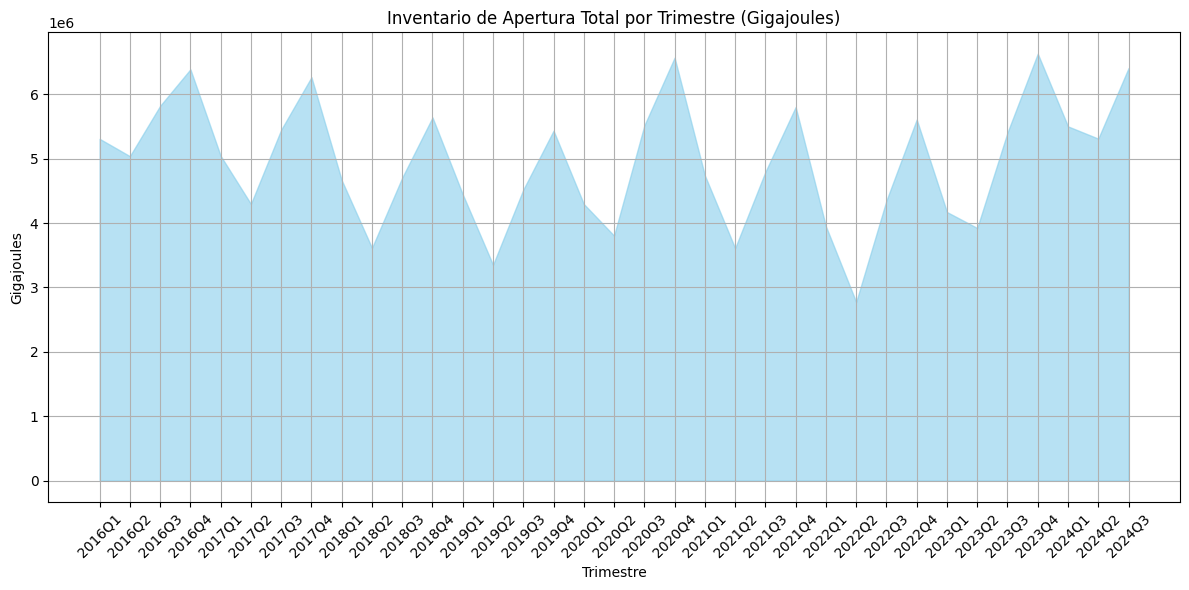

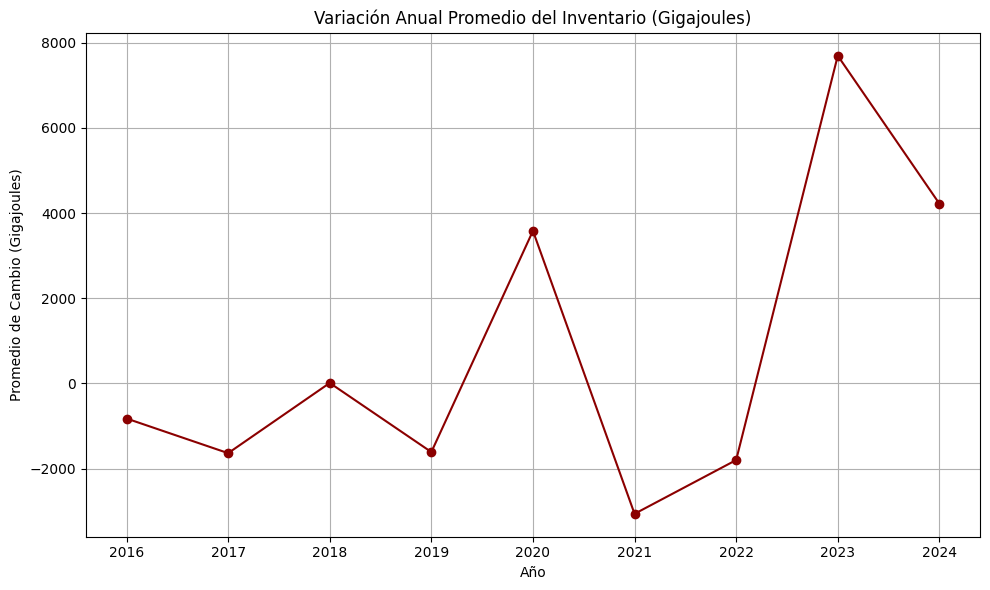

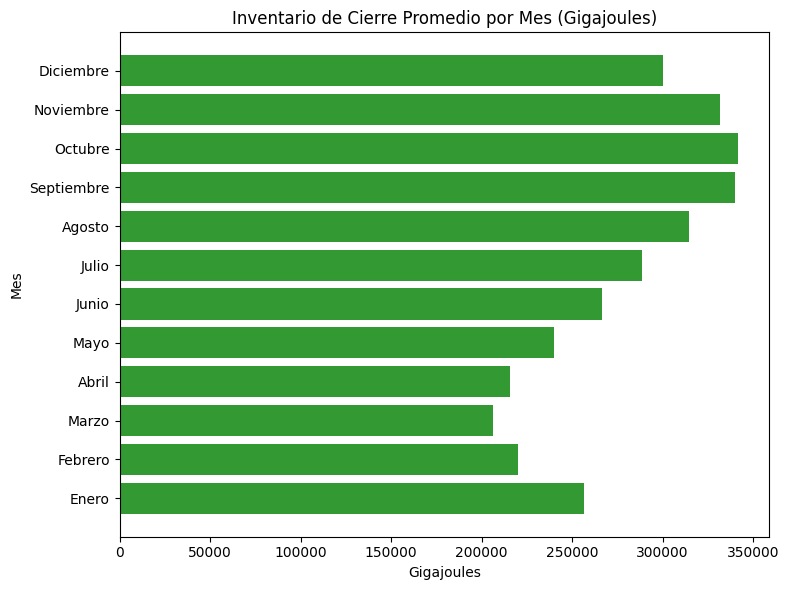

In [ ]:
# EjEMPLO 2 con el documento Saving natural_gas_storage_inventory_2016_2024.csv
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Subir archivo localmente
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Cargar el archivo
df = pd.read_csv(file_name)

# Convertir REF_DATE a formato datetime
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Filtrar datos con unidad de medida en Gigajoules
df = df[df['Statistics'] == 'Gigajoules']

# Calcular inventarios totales de apertura por trimestre
df['Quarter'] = df['REF_DATE'].dt.to_period('Q')
opening_inventory_quarterly = df[df['Storage'] == 'Opening inventory'].groupby('Quarter')['VALUE'].sum()

# Gráfico de área: Inventario de apertura por trimestre
plt.figure(figsize=(12, 6))
plt.fill_between(opening_inventory_quarterly.index.astype(str), opening_inventory_quarterly.values, color='skyblue', alpha=0.6)
plt.title('Inventario de Apertura Total por Trimestre (Gigajoules)')
plt.xlabel('Trimestre')
plt.ylabel('Gigajoules')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Calcular variaciones anuales en el inventario
df['Year'] = df['REF_DATE'].dt.year
yearly_variation = df[df['Storage'] == 'Inventory change'].groupby('Year')['VALUE'].mean()

# Gráfico de línea con marcadores: Variación anual promedio
plt.figure(figsize=(10, 6))
plt.plot(yearly_variation.index, yearly_variation.values, marker='o', linestyle='-', color='darkred')
plt.title('Variación Anual Promedio del Inventario (Gigajoules)')
plt.xlabel('Año')
plt.ylabel('Promedio de Cambio (Gigajoules)')
plt.grid()
plt.tight_layout()
plt.show()

# Promedio mensual del inventario de cierre
df['Month'] = df['REF_DATE'].dt.month
closing_inventory_monthly = df[df['Storage'] == 'Closing inventory'].groupby('Month')['VALUE'].mean()

# Gráfico de barras horizontales: Inventario de cierre promedio mensual
plt.figure(figsize=(8, 6))
plt.barh(closing_inventory_monthly.index, closing_inventory_monthly.values, color='green', alpha=0.8)
plt.title('Inventario de Cierre Promedio por Mes (Gigajoules)')
plt.xlabel('Gigajoules')
plt.ylabel('Mes')
plt.yticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.tight_layout()
plt.show()


Saving co2.csv to co2.csv


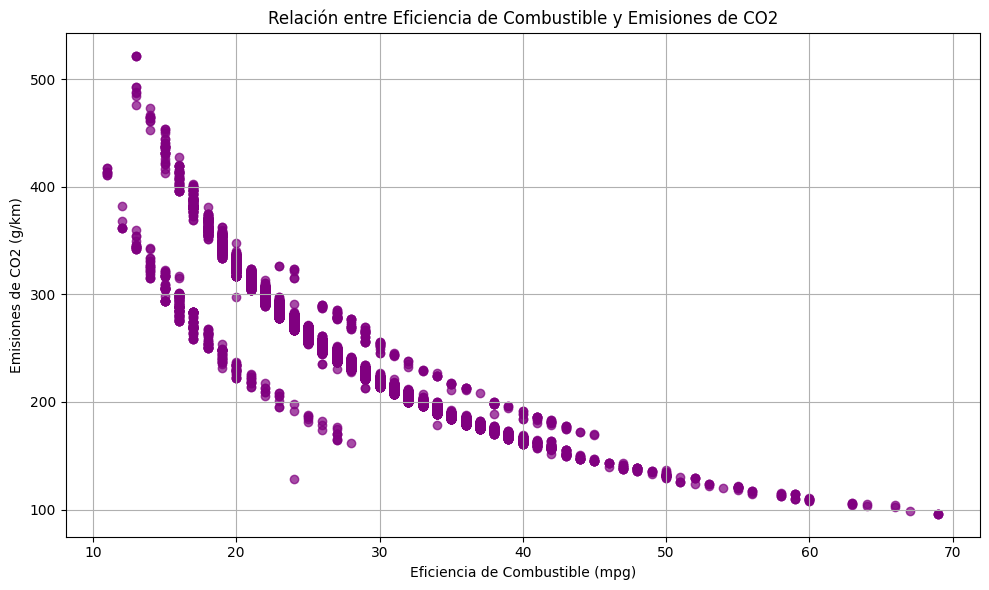

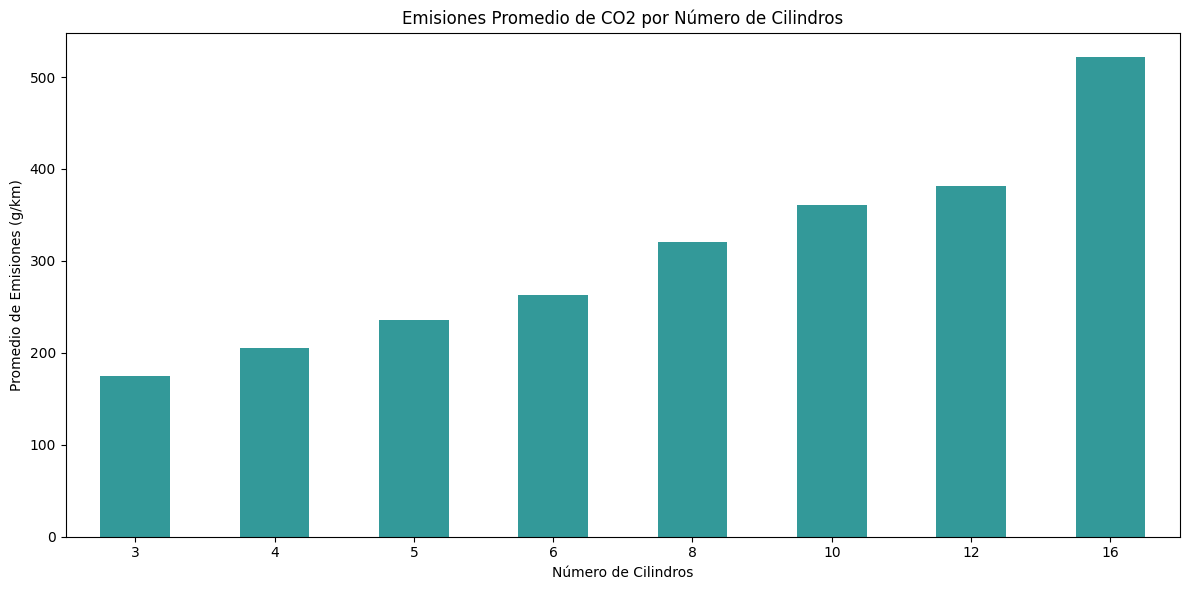

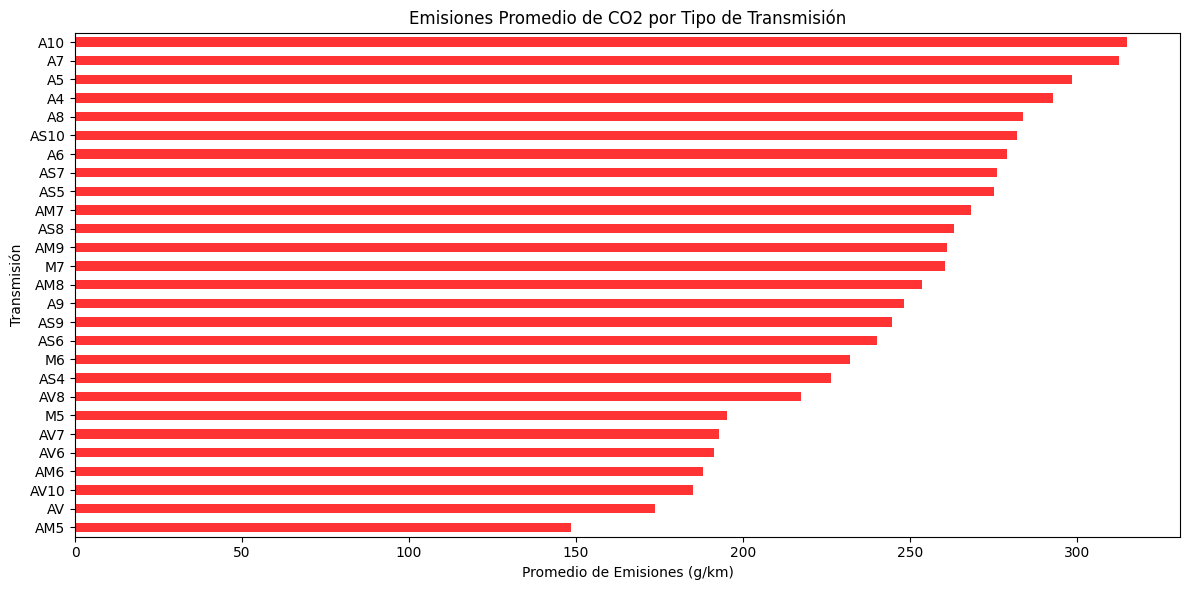

In [ ]:
#Ejemplo 3 con el documento CO2
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

df['Efficiency'] = df['Fuel Consumption Comb (mpg)']

plt.figure(figsize=(10, 6))
plt.scatter(df['Efficiency'], df['CO2 Emissions(g/km)'], alpha=0.7, color='purple')
plt.title('Relación entre Eficiencia de Combustible y Emisiones de CO2')
plt.xlabel('Eficiencia de Combustible (mpg)')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.grid()
plt.tight_layout()
plt.show()

emissions_by_cylinders = df.groupby('Cylinders')['CO2 Emissions(g/km)'].mean().sort_values()

plt.figure(figsize=(12, 6))
emissions_by_cylinders.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Emisiones Promedio de CO2 por Número de Cilindros')
plt.xlabel('Número de Cilindros')
plt.ylabel('Promedio de Emisiones (g/km)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

emissions_by_transmission = df.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values()

plt.figure(figsize=(12, 6))
emissions_by_transmission.plot(kind='barh', color='red', alpha=0.8)
plt.title('Emisiones Promedio de CO2 por Tipo de Transmisión')
plt.xlabel('Promedio de Emisiones (g/km)')
plt.ylabel('Transmisión')
plt.tight_layout()
plt.show()


Saving leadlevelScools.csv to leadlevelScools (1).csv


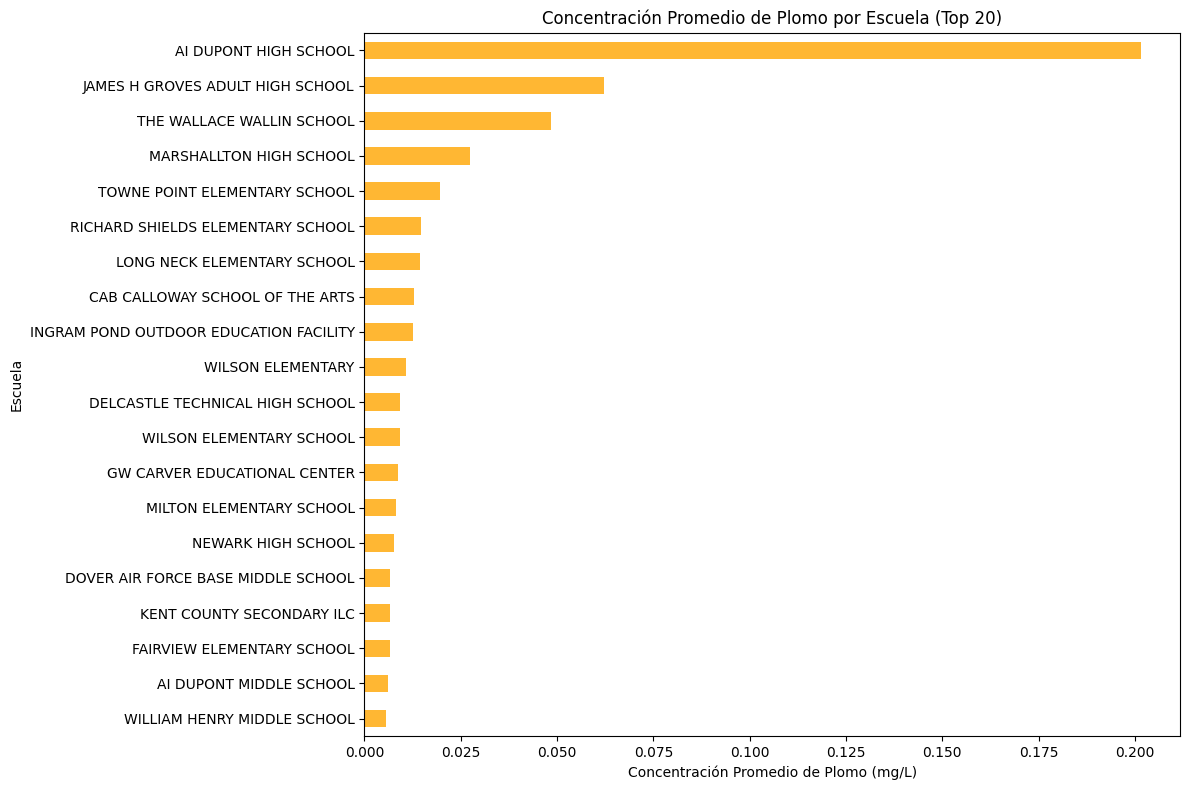

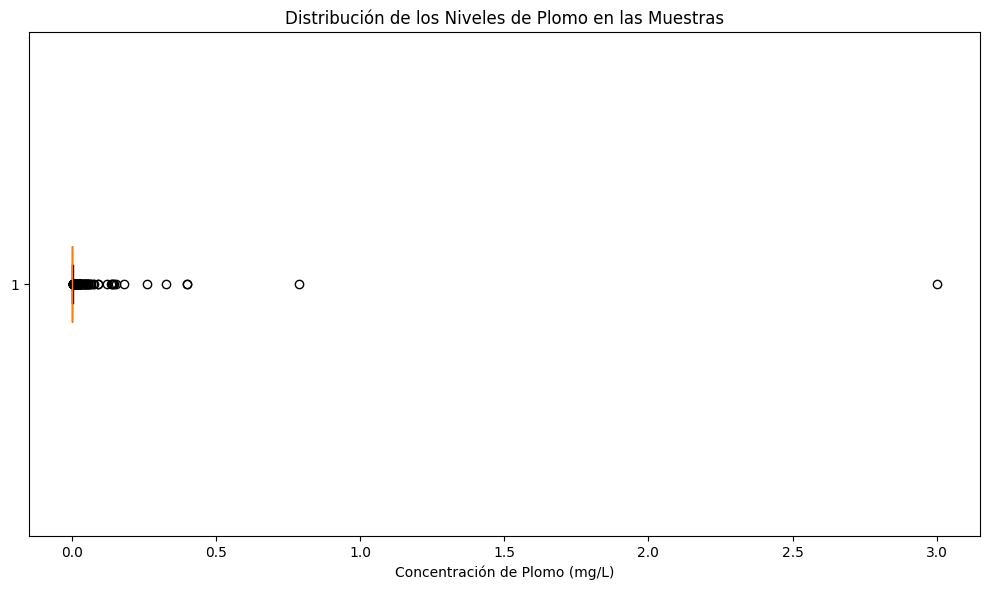

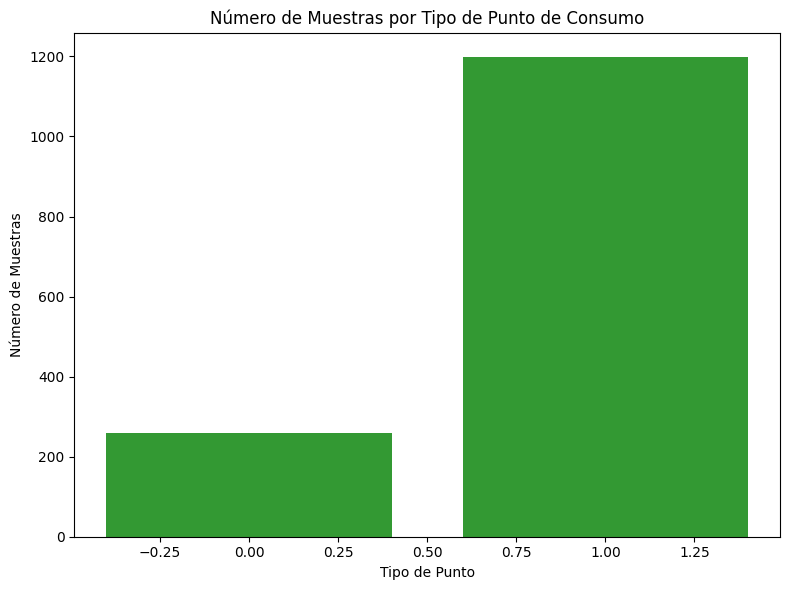

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

schools_avg_lead = df.groupby('School')['Result'].mean().sort_values()

# Filtrar las 20 escuelas con mayor concentración promedio de plomo
top_schools_avg_lead = schools_avg_lead.tail(20)

plt.figure(figsize=(12, 8))
top_schools_avg_lead.plot(kind='barh', color='orange', alpha=0.8)
plt.title('Concentración Promedio de Plomo por Escuela (Top 20)')
plt.xlabel('Concentración Promedio de Plomo (mg/L)')
plt.ylabel('Escuela')
plt.tight_layout()
plt.show()

# Boxplot para visualizar la distribución de los niveles de plomo
plt.figure(figsize=(10, 6))
plt.boxplot(df['Result'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución de los Niveles de Plomo en las Muestras')
plt.xlabel('Concentración de Plomo (mg/L)')
plt.tight_layout()
plt.show()

# Gráfico de barras para el número de muestras por tipo de punto de consumo
consumption_counts = df.groupby(['Consumption Point'])['Result'].count()

plt.figure(figsize=(8, 6))
plt.bar(consumption_counts.index, consumption_counts.values, color='green', alpha=0.8)
plt.title('Número de Muestras por Tipo de Punto de Consumo')
plt.xlabel('Tipo de Punto')
plt.ylabel('Número de Muestras')
plt.tight_layout()
plt.show()



Saving pollution.csv to pollution.csv


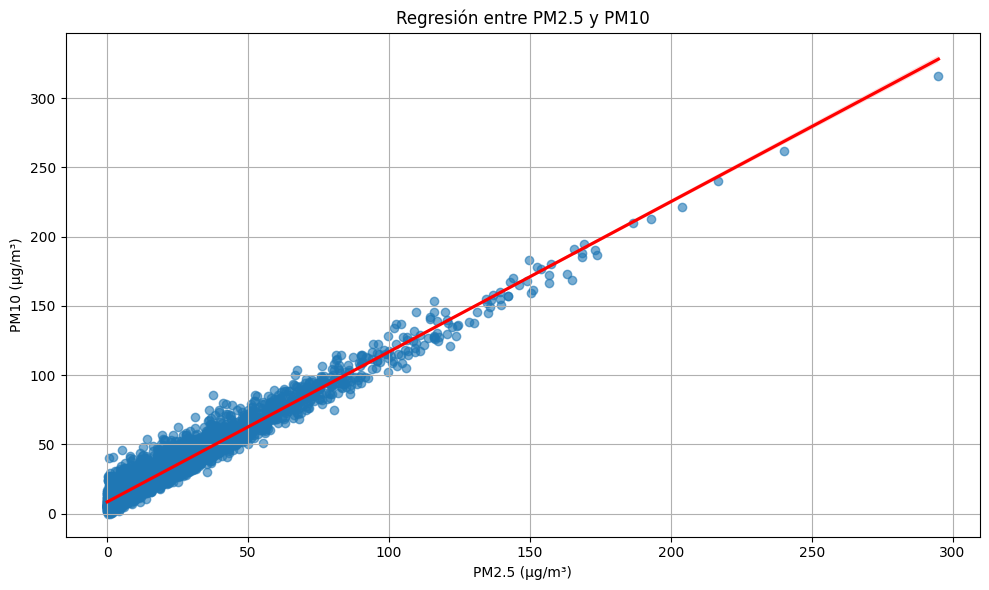

<ipython-input-3-5c8aeb3c951f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Air Quality', y='PM2.5', data=df, palette='muted')


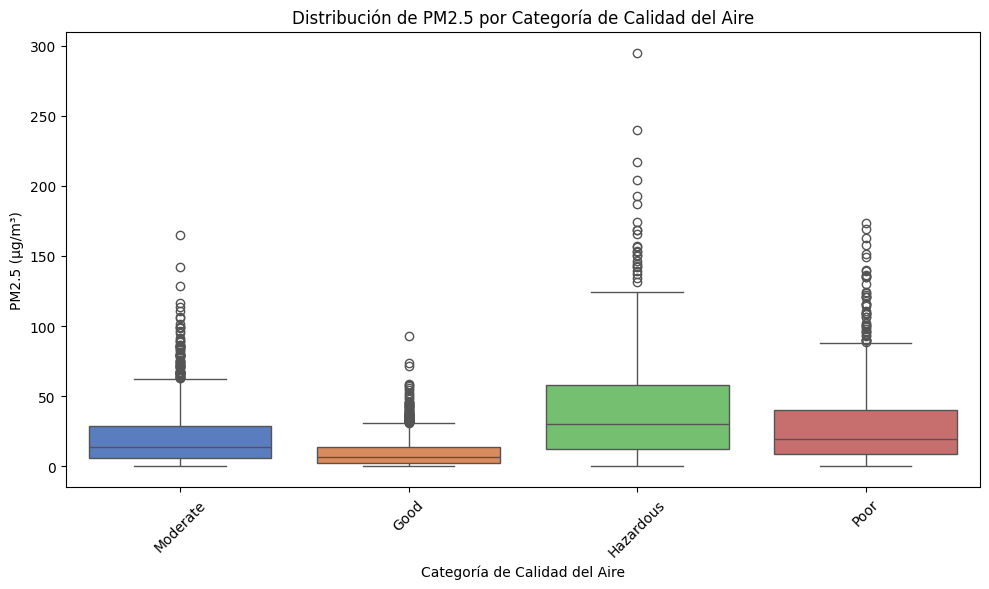

<ipython-input-3-5c8aeb3c951f>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proximity_distribution = df.groupby(industrial_bins)['PM2.5'].mean()


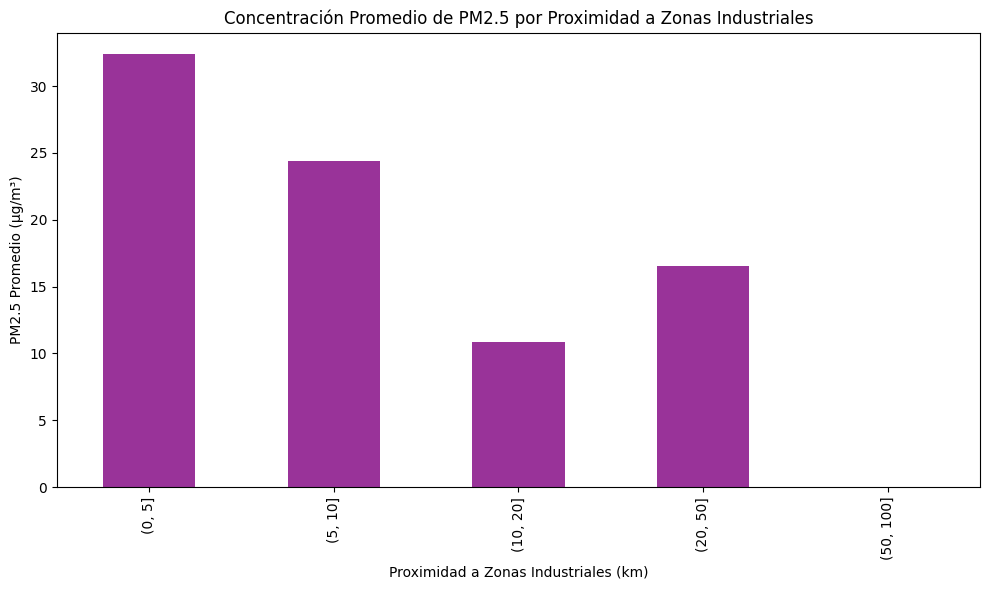

In [ ]:
#Ejemplo 5: Con el documento Pollution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

plt.figure(figsize=(10, 6))
sns.regplot(x='PM2.5', y='PM10', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Regresión entre PM2.5 y PM10')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('PM10 (µg/m³)')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Quality', y='PM2.5', data=df, palette='muted')
plt.title('Distribución de PM2.5 por Categoría de Calidad del Aire')
plt.xlabel('Categoría de Calidad del Aire')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

industrial_bins = pd.cut(df['Proximity_to_Industrial_Areas'], bins=[0, 5, 10, 20, 50, 100])
proximity_distribution = df.groupby(industrial_bins)['PM2.5'].mean()

plt.figure(figsize=(10, 6))
proximity_distribution.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Concentración Promedio de PM2.5 por Proximidad a Zonas Industriales')
plt.xlabel('Proximidad a Zonas Industriales (km)')
plt.ylabel('PM2.5 Promedio (µg/m³)')
plt.tight_layout()
plt.show()


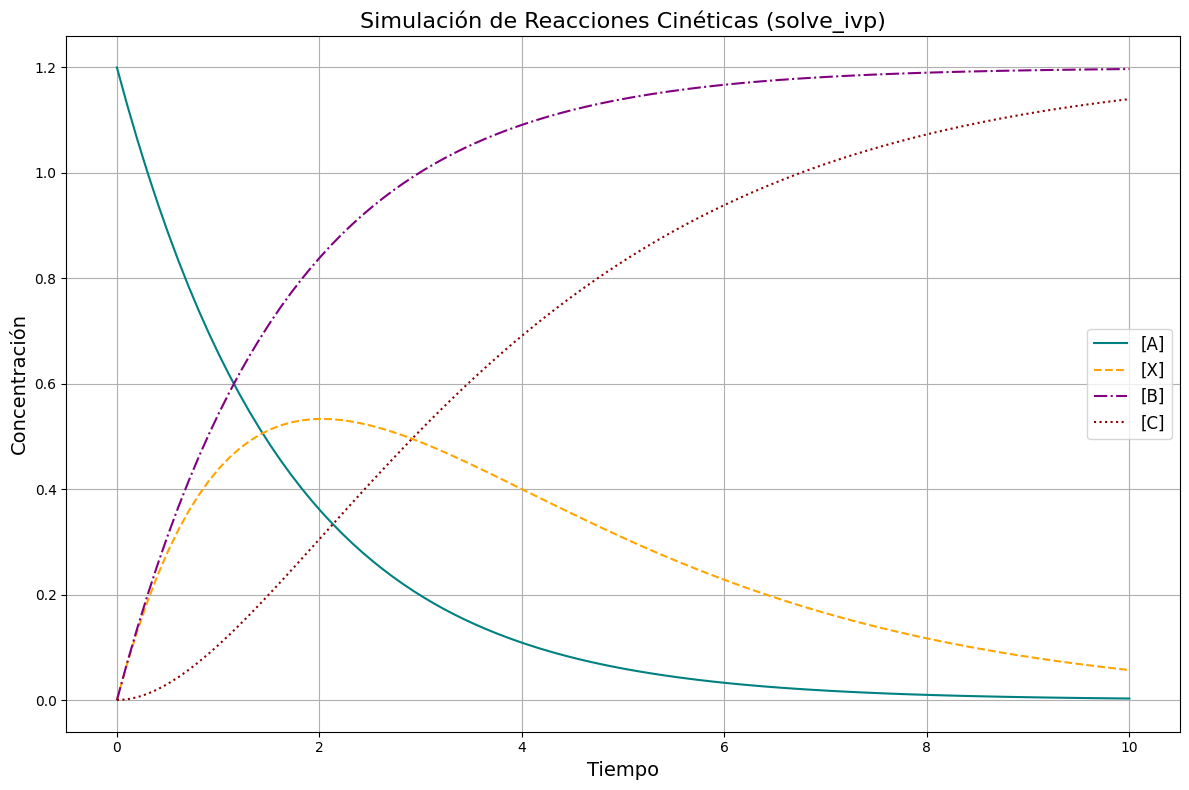

In [ ]:
#PROBLEMA 2:
#Desarrolle un Programa en Python para simular la cinética:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir constantes de reacción
rate_k1 = 0.6  # Constante para A -> X + B
rate_k2 = 0.4  # Constante para X -> C

# Concentraciones iniciales
initial_A = 1.2  # Concentración inicial de A
initial_X = 0.0  # Concentración inicial de X
initial_B = 0.0  # Concentración inicial de B
initial_C = 0.0  # Concentración inicial de C

# Ecuaciones diferenciales del sistema
def reaction_kinetics(t, concentrations):
    A, X, B, C = concentrations
    dA = -rate_k1 * A
    dX = rate_k1 * A - rate_k2 * X
    dB = rate_k1 * A
    dC = rate_k2 * X
    return [dA, dX, dB, dC]

# Tiempo de simulación
time_span = (0, 10)
time_points = np.linspace(0, 10, 100)

# Resolver las ecuaciones diferenciales
initial_conditions = [initial_A, initial_X, initial_B, initial_C]
solution = solve_ivp(reaction_kinetics, time_span, initial_conditions, t_eval=time_points)

# Extraer soluciones
A_conc, X_conc, B_conc, C_conc = solution.y

# Graficar los resultados
plt.figure(figsize=(12, 8))  # Cambiado a tamaño 12 x 8
plt.plot(time_points, A_conc, label='[A]', color='teal', linestyle='-')
plt.plot(time_points, X_conc, label='[X]', color='orange', linestyle='--')
plt.plot(time_points, B_conc, label='[B]', color='purple', linestyle='-.')
plt.plot(time_points, C_conc, label='[C]', color='darkred', linestyle=':')
plt.title('Simulación de Reacciones Cinéticas (solve_ivp)', fontsize=16)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Concentración', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()



In [ ]:
#Problema #5: Sobre los parametros para la Uroanálisis
# Rangos de referencia para un uroanálisis
ranges = {
    "pH": {"bajo": 4.5, "normal": (5.0, 8.0), "alto": 8.5},
    "Glucosa": {"bajo": 0, "normal": (0, 130), "alto": 200},
    "Proteínas": {"bajo": 0, "normal": (0, 150), "alto": 200},
    "Cetonas": {"bajo": 0, "normal": (0, 5), "alto": 10},
    "Nitritos": {"bajo": 0, "normal": (0, 0.1), "alto": 0.2}
}

# Datos de pacientes
pacientes = [
    {"Nombre": "Paciente 1", "pH": 6.0, "Glucosa": 100, "Proteínas": 50, "Cetonas": 3, "Nitritos": 0.05},
    {"Nombre": "Paciente 2", "pH": 4.0, "Glucosa": 150, "Proteínas": 200, "Cetonas": 12, "Nitritos": 0.3},
    {"Nombre": "Paciente 3", "pH": 8.0, "Glucosa": 0, "Proteínas": 100, "Cetonas": 1, "Nitritos": 0.1},
    {"Nombre": "Paciente 4", "pH": 7.5, "Glucosa": 140, "Proteínas": 140, "Cetonas": 0, "Nitritos": 0.02},
    {"Nombre": "Paciente 5", "pH": 9.0, "Glucosa": 250, "Proteínas": 250, "Cetonas": 15, "Nitritos": 0.4},
]

# Clasificar un valor según el rango
def clasificar(valor, rangos):
    if valor < rangos["bajo"]:
        return "Bajo"
    elif rangos["normal"][0] <= valor <= rangos["normal"][1]:
        return "Normal"
    elif valor > rangos["alto"]:
        return "Alto"
    else:
        return "Fuera de rango"

# Analizar los datos y clasificar
resultados = []
for paciente in pacientes:
    clasificacion = {"Nombre": paciente["Nombre"]}
    for parametro, valor in paciente.items():
        if parametro != "Nombre":
            clasificacion[parametro] = clasificar(valor, ranges[parametro])
    resultados.append(clasificacion)

# Mostrar los resultados
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


       Nombre      pH         Glucosa       Proteínas Cetonas Nitritos
0  Paciente 1  Normal          Normal          Normal  Normal   Normal
1  Paciente 2    Bajo  Fuera de rango  Fuera de rango    Alto     Alto
2  Paciente 3  Normal          Normal          Normal  Normal   Normal
3  Paciente 4  Normal  Fuera de rango          Normal  Normal   Normal
4  Paciente 5    Alto            Alto            Alto    Alto     Alto
